In [ ]:
pip install scikit-posthocs

In [ ]:
pip install pvlib #Required for Solar Features

In [ ]:
pip install meteostat #Weather data python API library

In [ ]:
pip install distfit

In [ ]:
pip install xgboost

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time

from scipy.stats import kruskal
from scikit_posthocs import posthoc_nemenyi
from statsmodels.stats.multitest import multipletests
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import TimeSeriesSplit 
from sklearn.metrics import mean_squared_error

import xgboost as xgb

import pvlib
from pvlib.location import Location
from pvlib import clearsky, solarposition,tracking
from meteostat import Hourly,Point
from distfit import distfit

import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Veri Seti Hakkında Genel Bilgiler**

Bu arşiv, Aralık 2006 ile Kasım 2010 (47 ay) arasında Sceaux'da (Paris'e 7 km, Fransa) bulunan bir evde toplanan 2075259 ölçümü içermektedir.


1.date: gg/aa/yyyy biçiminde tarih

2.time: hh:mm:ss formatında zaman

3.global_active_power: hane halkı küresel dakika ortalama aktif güç (kilowatt cinsinden)

4.global_reactive_power: hane halkı küresel dakika ortalama reaktif gücü (kilowatt cinsinden)

5.voltaj: dakika ortalamalı voltaj (volt cinsinden)

6.global_intensity: hane halkı küresel dakika ortalamalı akım yoğunluğu (amper cinsinden)

7.sub_metering_1: 1 numaralı enerji alt ölçümü (watt-saat aktif enerji cinsinden). Esas olarak bir bulaşık makinesi, bir fırın ve bir mikrodalga fırın içeren mutfağa karşılık gelir (ocaklar elektrikli değil gazla çalışır).

8.sub_metering_2: 2 numaralı enerji alt ölçümü (watt-saat aktif enerji cinsinden). Bir çamaşır makinesi, bir çamaşır kurutma makinesi, bir buzdolabı ve bir ışık içeren çamaşır odasına karşılık gelir.

9.sub_metering_3: 3 numaralı enerji alt ölçümü (watt-saat aktif enerji olarak). Bir elektrikli su ısıtıcısına ve bir klimaya karşılık gelir.

----------------https://elektrikportal.com/aktif-reaktif-gorunur-guc-nedir/------------------------------------------------------

**Bazı Terimlerin Açıklamaları:**
- **Aktif Güç:** Elektrik devrelerinde alıcılar tarafından şebekeden çekilen faydalı, işe yarayan güce Aktif Güç denir. Örnek olarak; Elektrik akımının, Isıtıcılarda ısıya, motorlarda harekete, aydınlatma armatürlerinde ise ışığa dönüşürler.Bunlar faydalı yani işe yarayan Aktif güç örnekleridir.

- **Reaktif Güç:** Elektrik devrelerinde kaynaktan çekilip, sonradan tekrar kaynağa geri dönen güce Reaktif Güç denir. Motorlarda ve bobinli devrelerde manyetik alanın, kondansatörlerde gerekli elektrik alanının oluşumunu sağlar.Bu alanların oluşumu için kaynaktan çekilen güç alanlar yok olurken tekrar kaynağa iade edilir. Reaktif gücün alıcılarda karşılığı olmadığından kör güç olarakta bilinmektedir.Gerekli önlemler alınmazsa şebekede gereksiz yere kapasite işgal ederler. Reaktif güç, Volt Amper Reaktif kelimelerinin kısaltması olan VAR birimi ile gösterilir.
- **Kısaca Aktif, Reaktif Güç**
    - Bir yük tarafından harcanan güce aktif güç denir. Aktif güç P harfi ile sembolize edilir.
    - Reaktif özelliklerinden dolayı yalnızca emilen ve yükte geri dönen güç , reaktif güç olarak adlandırılır.
 
 -------------------------------------------------------------------------------------------------------------------
 
**About Dataset**

 This dataset contains 2075259 measurements collected between December 2006 and November 2010 (47 months) in a house located in Sceaux (7 km from Paris, France).


1.date: date in dd/mm/yyyy format

2.time: time in hh:mm:ss format

3.global_active_power: household global minute average active power (in kilowatts)

4.global_reactive_power: household global minute average reactive power (in kilowatts)

5th voltage: minute averaged voltage (in volts)

6.global_intensity: household global minute-averaged current intensity (in amperes)

7.sub_metering_1: Energy sub-metering number 1 (in watt-hours of active energy). It mainly corresponds to the kitchen, which includes a dishwasher, an oven and a microwave oven (hobs are gas, not electric).

8.sub_metering_2: Energy submetering number 2 (in watt-hours of active energy). Corresponds to the laundry room containing a washing machine, a tumble dryer, a refrigerator and a light.

9.sub_metering_3: Energy submetering number 3 (in watt-hours of active energy). Corresponds to an electric water heater and an air conditioner.

**Explanations of Some Terms:**


- **Active Power:** The useful, useful power drawn from the network by the receivers in electrical circuits is called Active Power. For example; Electric current is transformed into heat in heaters, into heat in heaters, into motion in motors, and into light in lighting fixtures.

- **Reactive Power:** In electrical circuits, the power that is drawn from the source and then returned to the source is called Reactive Power. It provides the formation of the magnetic field in motors and coil circuits and the required electric field in capacitors. The power drawn from the source for the formation of these fields is returned to the source again as the fields disappear. Reactive power is also known as blind power because it has no equivalent in receivers. If necessary precautions are not taken, they occupy unnecessary capacity in the network. Reactive power is indicated by the VAR unit, which is the abbreviation of the words Volt Ampere Reactive.
- **In short Active, Reactive Power**

    - The power dissipated by a load is called active power. Active power is symbolized by the letter P.

    - Power that is only absorbed and returned in the load due to its reactive properties is called reactive power.
    

# CONFIGURATION

In [ ]:
class config:
    dir_dataset = "/kaggle/input/electric-power-consumption-data-set/household_power_consumption.txt"
    
    use_pca = True
    sum_sub_meterings = True
    add_moving_averages = True
    change_2008August_values = False
    
    n_splits = 5

# UTILS

In [ ]:
def preprocessing(dataframe: pd.DataFrame) -> pd.DataFrame:
    
    """
        This fuction does some preprocecessing operation on dataset
    
    """
    #Create list for float data type columns 
    float_columns = ["Global_active_power",
                    "Global_reactive_power",
                    "Voltage",
                    "Global_intensity",
                    "Sub_metering_1",
                    "Sub_metering_2",
                    "Sub_metering_3"]
    #Change ? ve "nan" to np.nan 
    dataframe[float_columns] = dataframe[float_columns].replace(["?", "nan"], np.nan)
    
    #NaN değerleri bir önceki değerler ile değiştirmek
    #dataframe[float_columns] = dataframe[float_columns].fillna(method = "ffill")
    
    dataframe = dataframe.dropna()
    
    #Change data type to float
    dataframe[float_columns] = dataframe[float_columns].astype(float)
    
    #Merge Date and Time columns
    dataframe["Datetime"] = dataframe["Date"] + " " + dataframe["Time"]
    #Change Datetime feature type to Datetime
    dataframe["Datetime"] = pd.to_datetime(dataframe["Datetime"].str.replace("/", "-"), format = "%d-%m-%Y %H:%M:%S")
    
    #Remove Date and Time columns
    dataframe = dataframe.drop(columns = ["Date", "Time"])
    
    return dataframe

In [ ]:
def date_transform(dataframe: pd.DataFrame) -> pd.DataFrame:
    """
        This fuction creates time-based features
    
    """
    
    dataframe["Hour"] = dataframe.index.hour
    dataframe["Day_ofweek"] = dataframe.index.dayofweek
    dataframe["Day_ofmonth"] = dataframe.index.day
    dataframe["Day_ofyear"] = dataframe.index.dayofyear
    dataframe["Week_ofyear"] = dataframe.index.isocalendar().week
    dataframe["Month"] = dataframe.index.month
    dataframe["Quarter"] = dataframe.index.quarter
    dataframe["Year"] = dataframe.index.year
    
    return dataframe

In [ ]:
def conduct_kruskal_wallist_test(dataframe: pd.DataFrame,
                                group_feature:str,
                                target_feature: str = "Global_active_power"):
    
    """
        This function perform kruskal-wallist-test
        
        Parameters:
            dataframe: pd.DataFrame object to conduct test
            group_feature: the categorical feature we want to compare
            target_feature: the feature we want to estimate
    """
    #Drop NaN values to calculate Kruskal_Wallis results
    dataframe = dataframe.dropna().copy()
    #Conduct Kruskal_Wallis Test
    kruskal_result = kruskal(*[dataframe[target_feature][dataframe[group_feature] == feature] for feature in dataframe[group_feature].unique()])
    
    #Display Kruskal-Wallis results
    print("Kruskal-Wallis p-value: ", kruskal_result.pvalue)
    
    if kruskal_result.pvalue < 0.05:
        print("At least one group has a significantly different median value")
    else:
        print("The medians of the groups do not differ significantly from each other")
    

In [ ]:
def plot_nemenyi_posthoc_test(dataframe:pd.DataFrame,
                             group_feature:str,
                             target_feature:str = "Global_active_power",
                             is_mask: bool = True):
    
    """
    
        This function perform Nemenyi Post Hoc Test and plot results
        
        Parameters:
            dataframe: pd.DataFrame object to conduct test
            group_feature: the categorical feature we want to compare
            target_feature: the feature we want to estimate
            is_mask: created to plot the heatmapp according to whether we want a mask in heatmapp or not
    """
    
    #Drop NaN values to conduct Nemenyi post hoc test
    dataframe = dataframe.dropna().copy()
    #Conduct Nemenyi post hoc test
    nemenyi_result = posthoc_nemenyi(dataframe,
                                    val_col = target_feature,
                                    group_col = group_feature)
    
    #Adjust p-values for multiple comparisons
    p_values = nemenyi_result.values.flatten()
    adjusted_p_values = multipletests(p_values,
                                     method = "bonferroni")[1].reshape(nemenyi_result.shape)
    
    #Display graph for Nemenyi post hoc results
    plt.figure(figsize = (10, 6))
    plt.title("Significant Differences between Groups (Nemenyi Test)")
    
    if is_mask:
        #Set the significance level (e.g., 0.05)
        alpha = 0.05
        #Create a mask for significant differences
        mask = adjusted_p_values < alpha
        
        sns.heatmap(nemenyi_result,
                   annot = True,
                   cmap = "Spectral",
                   fmt = ".2f",
                   mask = ~mask)
        plt.show()
    
    else:
        sns.heatmap(nemenyi_result,
                   annot = True,
                   cmap = "Spectral",
                   fmt = ".2f",
                   mask = ~mask)
        plt.show()
    

In [ ]:
def plot_dist_pdf_cdf(dataframe: pd.DataFrame, 
                      col: str):
    """
        This function finds best distribution for feature we want and plot PDF and CDF
    
    """
    
    
    #Create figure for graph
    fig, ax = plt.subplots(1, 3, figsize = (30, 10))
    #Create distribution with 100 boosttraping in popular distributions
    dfit = distfit(distr = "popular")
    
    #Fit and transform to feature
    results = dfit.fit_transform(dataframe.loc[~dataframe[col].isnull(), col].values)
    #Create graph to find best distribution
    dfit.plot_summary(n_top = 10, ax=ax[0])
    # PDF for only the best fit
    dfit.plot(chart='PDF', n_top=1, ax=ax[1])
    # CDF for the top 10 fits
    dfit.plot(chart='CDF', n_top=10, ax=ax[2])
    
    #ax[0].set_title("Finding Best Distribution with Using Kolmogorov-Smirnov Test and Bootstrapping Technique")
    #ax[1].set_title("PDF Graph for Best Distribution")
    #ax[2].set_title("CDF Graph for 10 Best Fit Distributions")
    #Show graph
    plt.show()

In [ ]:
def plot_boxplot(dataframe: pd.DataFrame,
                x_axis: str,
                y_axis: str = "Global_active_power"):

    # Parameters
    # dataframe: Dataframe which will draw
    # x_axis : X axis column for boxplot graph
    # y_axis : Y axis column for boxplot graph
    
    """
        This fucntion created to plot boxplot for comparison of categorical attributes in terms of Global_active_power
    
    """
    
    #Create figure for graph
    plt.figure(figsize = (30, 6))
    
    #Plot boxplot
    sns.boxplot(data = dataframe,
               x = x_axis,
               y = y_axis)
    
   # Set title for graph
    plt.title(f"{y_axis.capitalize()} by {x_axis}")
    
    #Display graph
    plt.show()
    

In [ ]:
def plot_moving_average(dataframe: pd.DataFrame,
                        window = int):

    #Parameters
    #dataframe: Dataframe object which will be use
    #window: window for rolling
    
    """
        This function specify moving averages of Global_active_power and plot them with True values for last 120 values
    
    """
    
    #Create moving average for Global_active_power
    moving_average = dataframe["Global_active_power"].shift(1).rolling(window).mean()
    actual = dataframe["Global_active_power"][-(window+120):]
    ma = dataframe["Global_active_power"][-(window+120):]
    
    #Create figure for graph
    plt.figure(figsize = (15, 6))
    
    #Plot graph for actual and moving average values
    sns.lineplot(actual, label = "Actual", color = "green")
    sns.lineplot(ma, label = f"MA-{window}", linestyle = "--", linewidth = 2, color = "orange")
    
    #Set title for graph
    plt.title(f"Comparison of Moving Averages and Actual Global_active_power values Last 120 Values",
             fontsize = 15,
             weight = "bold")
    #Display graph
    plt.show()

In [ ]:
def solar_features(latitude: float,
                   longitude: float,
                   tz: str,
                   city: str,
                   start: str,
                   end: str):
    
    """
        Source: https://github.com/pvlib/pvlib-python

        Features indicating the angle of incidence of the sun's rays to the relevant location.

        We can produce these features as lead and lag features for the period we want.
        It will not create any leakage element. It was used to reflect the seasonality effect.
        
        This dataset contains gni, dni and dhi of Scheax city 

    """
    
    
    tus = Location(latitude, longitude, tz, 102, city)
    times = pd.date_range(start, end, freq='H', tz=tus.tz, inclusive = "left")
    cs = tus.get_clearsky(times)  # ineichen with climatology table by default
    cs=cs.reset_index().rename(columns={'index':'Tarih'})
    cs['Tarih'] = pd.to_datetime(cs['Tarih'], format = "%d/%m/%Y %H/%M")
    cs['Tarih']=cs['Tarih'].dt.tz_localize(None)
    cs = cs.iloc[:-2]
    
    return cs
    

In [ ]:
def advanced_solar_features(latitude: float,
                           longitude: float,
                           tz: str,
                           city: str,
                           start: str,
                           end: str
                           ):

    """
        Source: https://github.com/pvlib/pvlib-python

        Other detailed features indicating the angle of incidence of the sun's rays on the respective location.
    
    
    """
    
    times = pd.date_range(start, end, freq='H',tz=tz, inclusive = "left")
    #Get solar position in hourly basis for Scheax city
    solpos = solarposition.get_solarposition(times, latitude, longitude)
    
    #Get angle of solar position for Scheax city 
    truetracking_angles = tracking.singleaxis(
        apparent_zenith=solpos['apparent_zenith'],
        apparent_azimuth=solpos['azimuth'],
        axis_tilt=0,
        axis_azimuth=180,
        max_angle=90,
        backtrack=False,  # for true-tracking
        gcr=0.5)  # irrelevant for true-tracking
    truetracking_position = truetracking_angles['tracker_theta'].fillna(0)
    
    #Some adjustments for solar positions
    solpos=solpos.reset_index().rename(columns={'index':'Tarih'})
    solpos['Tarih'] = pd.to_datetime(solpos['Tarih'], format = "%d/%m/%Y %H/%M")
    solpos['Tarih']=solpos['Tarih'].dt.tz_localize(None)
    solpos=solpos.drop(['zenith','elevation'],axis=1)
    solpos.drop('apparent_elevation',axis=1,inplace=True)
    
    #Some adjustments for angle of solar positions
    truetracking_position = truetracking_position.reset_index().rename(columns={'index':'Tarih','tracker_theta':'sun_position'})
    truetracking_position['Tarih'] = pd.to_datetime(truetracking_position['Tarih'], format = "%d/%m/%Y %H/%M")
    truetracking_position['Tarih'] = truetracking_position['Tarih'].dt.tz_localize(None)
    truetracking_position['Tarih'] = pd.to_datetime(truetracking_position['Tarih'])
  
    #Get turbidity of sky
    turbidity = pvlib.clearsky.lookup_linke_turbidity(times, latitude, longitude, interp_turbidity=True)
    turbidity=turbidity.reset_index().rename(columns={'index':'Tarih',0:'turbidity'})
    turbidity['Tarih'] = pd.to_datetime(turbidity['Tarih'], format = "%d/%m/%Y %H/%M")
    turbidity['Tarih']=turbidity['Tarih'].dt.tz_localize(None)
    
    
    return solpos, truetracking_position, turbidity

In [ ]:
def meteostat_weather_data(latitude:float,
                           longitude:float,
                           start:"str",
                           end:"str"
                          ):
    
    """
        This function create dataset which contain features like Temperature, Windspeed, Wind direction.
    
    """

    location = Point(latitude, longitude)
    weather = Hourly('72219', pd.to_datetime(start), pd.to_datetime(end))
    weather = weather.fetch()
    weather = weather.reset_index().rename(columns = {'time':'Tarih'})
    weather = weather.drop(['snow','wpgt','tsun'],axis=1)
    weather['Tarih'] = pd.to_datetime(weather['Tarih'])
    weather = weather.drop("coco", axis = 1)
    
    
    return weather

In [ ]:
def merge_dataframes(list_df:list):
    """
        This function was created to merge train and test set with cs, solpos, weather, turbidity, truetracking_position datasets
    
    """
    dfs = []
    for dataframe in list_df:
        for other_df in [cs, solpos, weather, turbidity, truetracking_position]:
            dataframe = dataframe.reset_index()
            dataframe = pd.merge(dataframe, other_df, left_on = "Datetime", right_on = "Tarih", how = "left")
            dataframe = dataframe.fillna(method = "ffill")
            dataframe = dataframe.drop("Tarih", axis = 1)
            dataframe = dataframe.set_index("Datetime")
            
        dfs.append(dataframe)
    return (dfs[0], dfs[1])

In [ ]:
def plot_pie(
            dataframe: pd.DataFrame,
            columns_pie: list,
            title: str = "Upper"
):
    # Parameters:
    # dataframe: Dataframe which will draw
    # columns_pie: Columns which draw in pie graph
    
    """
        This function plots pie graph for features
    """
    
    #Create figure and axes for graph
    fig, ax = plt.subplots(nrows = 1, ncols = len(columns_pie), figsize = (18, 10))
    
    for i ,col in enumerate(columns_pie):
        #Get value_counts of feature
        value_columns_target = dataframe[col].value_counts()
        #Plot pie graph for feature
        ax[i].pie(value_columns_target.values, labels = value_columns_target.index, startangle = 140) #autopct='%1.1f%%'
        #Set title for axis
        ax[i].set_title(f"{col.capitalize()} Pie Chart")
    
    #Create a str for features in columns_pie
    str_list = ", ".join(columns_pie)
    #Set title for pie
    fig.suptitle(f" Examination of {title} Outlier Values By {str_list}", fontsize = 16, weight = "bold", y = 0.80)
    #Display graph
    plt.show()

In [ ]:
def plot_columns(
                dataframe: pd.DataFrame,
                list_col: list
):
    
    """
        In August 2008, we checked the values of the attributes. 
        Our goal is to gain insight into whether the continuous drop of the global_active_power attribute in this month is 
        due to measurement error or whether the values are normal.
    
    """
    #Creater figure and axes
    fig, ax = plt.subplots(nrows = len(list_col), ncols  = 1, figsize = (20, 5*len(list_col)))
    
    for i, col in enumerate(list_col):
        #Plot feature values in train data set
        df_train[col].plot(label = col, color = "Red", ax = ax[i])
        #Plot vertical line in 2008-08-1
        ax[i].axvline("2008-08-01 00:00:00", linestyle = "--", linewidth = 3)
        #Plot vertical line in 2008-09-1
        ax[i].axvline("2008-09-01 00:00:00", linestyle = "--", linewidth = 3)
        
        ax[i].legend()
    
    #Set title for graph
    fig.suptitle("Check Between 2008 August and September", weight = "bold", fontsize = 15, y = 0.92)
    #Display graph
    plt.show()

# IMPORT LIBRARY

In [ ]:
%%time
df = pd.read_csv(config.dir_dataset, sep = ";")
df.head()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

Only the **Sub_metering_3** column has nan values.

-----------------------------------------------------

Yalnızca **Sub_metering_3** sütunu nan değerlere sahiptir.

In [ ]:
df[df["Sub_metering_3"].isnull()]

Sub_metering_3 sütununun NaN olduğu satırlarda Date ve Time hariç diğer sütunlarda "?" değerini almıştır.

----------------------------------------------------------------------------------------------------------

In rows where the Sub_metering_3 column is NaN, the other columns except Date and Time have the value “?”.

In [ ]:
%%time
df = preprocessing(df)

In [ ]:
# Set index and resample in terms of hours
df = df.set_index("Datetime")
print(f"Old Dataframe Shape: {df.shape}")
#Convert data set to hourly time zone
df = df.resample("H").mean().copy()
print(f"Resampled DataFrame Shape: {df.shape}")

## Creation and Comparison of Test and Train Datasets

In [ ]:
# Create Test and Train Datasets
df_train = df[df.index <= "2010-06-01"].copy()
df_test = df[df.index > "2010-06-01"].copy()

print(f"Train dataset shape: {df_train.shape}")
print(f"Test dataset shape: {df_test.shape}")

Şimdi train ve test veri setlerindeki Global_active_power değerlerine bakalım.

------------------------------------------------------------------------------

Now let's look at Global_active_power values in train and test datasets.

In [ ]:
#Show Global Active Power from Test and Train Datasets
plt.figure(figsize = (20, 6))
df_train["Global_active_power"].plot(label = "Training Set", color = "Red")
df_test["Global_active_power"].plot(label  = "Test Set", color = "Orange")
plt.axvline("2010-06-01 00:00:00", linestyle = "--", linewidth = 3)
plt.text("2010-06-02 00:00:00", 6, "Split", fontsize = 20, fontweight = "bold")
plt.title("Data Splitting", weight = "bold", fontsize = 15)
plt.legend()
plt.show()


2008 yılının Ağustos ayında değerler dürekli biçimde oldukça aşağıda gelmiştir.

Test ve trains setindeki özelliklerin birbiri ile benzer dağılımlara sahip olması önemlidir. Çünkü train veri seti ile öğrenirken modelin doğruluğunu test veri seti ile yapacağız. 

---------------------------------------------------------------------------------------------

In August 2008 the values were consistently quite low.

It is important that the features in the test and trains set have similar distributions. Because while we learn the model with the train data set, we will verify the accuracy of the model with the test data set. 



In [ ]:
# Compared train to test datasets
i = 1
cols = [
    "Global_active_power",
    "Global_reactive_power",
    "Voltage",
    "Global_intensity",
    "Sub_metering_1",
    "Sub_metering_2",
    "Sub_metering_3"
]
#Create figure for graphs
plt.figure(figsize = (15, 30))

for col in cols:
    plt.subplot(len(cols), 1, i)
    sns.kdeplot(df_train[col], label  = "Training Set", color = "blue")
    sns.kdeplot(df_test[col], label  = "Test Set", color = "orange")
    plt.title(f"{col} Training vs Test Set")
    plt.gca().axes.get_xaxis().set_visible(False)
    i += 1

plt.show()

Test ve Train veri setindeki özellik olasılık dağılımları birbirine benzerdir. Bu istenen bir özelliktir.

----------------------------------------------------------------------------------------------------------

The feature probability distributions in the Test and Train dataset are similar. This is a desirable property.

# EDA

## Check Between 2008 August and September

In [ ]:
list_col = [
            "Global_reactive_power",
            "Voltage",
            "Global_intensity",
            "Sub_metering_1",
            "Sub_metering_2",
            "Sub_metering_3"
]

plot_columns(df_train, list_col)

Görüyoruzki 2008 yılının Ağustos Global_reactive_power, Sub_meterings_1, Sub_meterings_2 ve Sub_meterings_3 özelliklerinde de düşüş var. Bu ayda yaşayan aile bir yere tatile gitmiş olabilir.

---------------------------------------------------------------------------------------------------

We see that in August 2008 there is a decrease in Global_reactive_power, Sub_meterings_1, Sub_meterings_2 and Sub_meterings_3. The family living in this month may have gone on vacation somewhere.

## Correlation

In [ ]:
#Create figure for graph
plt.figure()
#Determine correlations of features
correlations = df_train.corr().abs()
#Determine mask for heatmapp
mask = np.triu(np.ones_like(correlations, dtype = "bool"))
#Plot heatmapp
sns.heatmap(correlations, annot = True, fmt = ".2f", cmap = "Spectral", mask = mask)
#Display graph
plt.show()

- Global_active_power ile Global_intensity özellikleri birbiri ile oldukça yüksek korelasyona sahiptir.
- Target değeri ile Global_active_power ve Sub_metering_3 özelliği diğerlerine nazaran yüksek korelasyona sahiptir.
- Target değeri ile Global_reactive_power ve Sub_metering_2 özelliği düşük korelasyon değerine sahiptir.

-------------------------------------------------------------------------------------------------------

- Global_active_power and Global_intensity are highly correlated with each other.
- Target has a high correlation with Global_active_power and Sub_metering_3.
- Target has a low correlation with Global_reactive_power and Sub_metering_2.

We will remove Global_intensity feature because of high correlation

In [ ]:
#Remove Global_intensity feature
df_train = df_train.drop("Global_intensity", axis = 1)
df_test = df_test.drop("Global_intensity", axis = 1)

## Value_counts

In [ ]:
cols = [
    "Global_active_power",
    "Global_reactive_power",
    "Voltage",
    "Sub_metering_1",
    "Sub_metering_2",
    "Sub_metering_3"
]
for col in cols:
    print(f"*" * 50)
    print(f"{df_train[col].value_counts()}")
    

- Sub_metering_1, Sub_metering_2 ve Sub_metering_3 özelliğinde oldukça çok sayıda 0 değeri bulunmaktadır.

-------------------------------------------------------------------------------------------------

- Sub_metering_1, Sub_metering_2 and Sub_metering_3 have a large number of 0 values.

In [ ]:
# Creating new features based on whether the sub_metering_? property is 0 or not
df_train.loc[df_train["Sub_metering_1"] == 0, "is_sub_meter_1"] = "Equal 0"
df_train.loc[df_train["Sub_metering_1"] != 0, "is_sub_meter_1"] = "Not Equal 0"

df_train.loc[df_train["Sub_metering_2"] == 0, "is_sub_meter_2"] = "Equal 0"
df_train.loc[df_train["Sub_metering_2"] != 0, "is_sub_meter_2"] = "Not Equal 0"

df_train.loc[df_train["Sub_metering_3"] == 0, "is_sub_meter_3"] = "Equal 0"
df_train.loc[df_train["Sub_metering_3"] != 0, "is_sub_meter_3"] = "Not Equal 0"

cols = [
    "is_sub_meter_1",
    "is_sub_meter_2",
    "is_sub_meter_3"
]

compared_cols = [
    "Sub_metering_1",
    "Sub_metering_2",
    "Sub_metering_3"
]

#Create figure for graph
plt.figure(figsize = (15,18))
for i, col in enumerate(cols):
    #Plot kdeplot Comparison of the Global_Active_power feature according to whether the is_sub_meter_? feature is 0 or not
    plt.subplot(len(cols), 1, i+1)
    sns.kdeplot(df_train, x = "Global_active_power", hue = cols[i])
    plt.title(f"Comparison of the Global_Active_power feature according to whether the {compared_cols[i]} feature is 0 or not", fontsize = 15, fontweight = "bold")
    plt.gca().axes.get_xaxis().set_visible(False)
    
    #Drop is_sub_meter_? features
    df_train = df_train.drop(col, axis = 1)

#Display graph
plt.show()



- Sub_meter_1 özelliği 0 olan satırlar ile 0 olmayan satırların Global_active_power dağılımları arasında **oldukça fazla** fark bulunmaktadır.
- Sub_meter_2 özelliği 0 olan satırlar ile 0 olmayan satırların Global_active_power dağılımları  **birbirine benzemektedir**.
- Sub_meter_3 özelliği 0 olan satırlar ile 0 olmayan satırların Global_active_power dağılımları arasında **birbirine yakınsamıştır**.

----------------------------------------------------------------------------------------------------

- There is a **very large** difference between the Global_active_power distributions of rows with sub_meter_1 property 0 and rows without 0.
- The Global_active_power distributions of rows with sub_meter_2 property 0 and rows without 0 are **similar**.
- The Global_active_power distributions of rows with sub_meter_3 feature 0 and rows without 0 are **converged**.

## Find Best Distributions for Features

The distfit library can determine the best fit across 89 theoretical distributions which are utilized from the scipy library. To score the fit, there are four goodness-of-fit statistical tests; Residual Sum of Squares (RSS or SSE), Wasserstein, Kolmogorov-Smirnov (KS), and Energy. For each fitted theoretical distribution, the loc, scale, and arg parameters are returned, such as mean and standard deviation for normal distribution.

And also best practice is to use both statistics and a visual curation to decide what the best distribution fit is. Using the PDF/CDF and QQ plots can be some of the best tools to guide those decisions. These plots will help to visually guide whether a distribution is a good fit. We can see in graphs the PDF with the confidence intervals and the CDF plot. The confidence intervals are automatically set to 95% CII but can be changed using the alpha parameter during initialization. When using the plot functionality, it automatically shows the histogram in bars and with a line, PDF/CDF, and confidence intervals. 


[Source](http://https://towardsdatascience.com/how-to-find-the-best-theoretical-distribution-for-your-data-a26e5673b4bd)

In [ ]:
# Find best distribution for Global_active_power
plot_dist_pdf_cdf(df_train, "Global_active_power")

Global_active_power özelliği en çok log-normal dağılıma benzemektedir. Bu bilgiyi daha sonradan kullanacağım.

------------------------------------------------------------------------------------

The global_active_power property is most similar to the log-normal distribution. I will use this information later.

In [ ]:
# Find best distribution for Global_reactive_power
#plot_dist_pdf_cdf(df_train, "Global_reactive_power")

In [ ]:
# Find best distribution for Voltage
#plot_dist_pdf_cdf(df_train, "Voltage")

In [ ]:
# Find best distribution for Sub_metering_1
#plot_dist_pdf_cdf(df_train, "Sub_metering_1")

In [ ]:
# Find best distribution for Sub_metering_2
#plot_dist_pdf_cdf(df_train, "Sub_metering_2")

In [ ]:
# Find best distribution for Sub_metering_3
#plot_dist_pdf_cdf(df_train, "Sub_metering_3")

## Add time-based features

Veri setimize zaman tabanlı özellikler ekleyeceğiz. Bu özellikler; saat, haftanın kaçıncı günü (day of week), ayın kaçıncı günü (day of month), yılın kaçıncı günü (day of year), yılın kaçıncı haftası (week of year), ay, dönem ve yıl olacaktır. Bu özelliklerden haftanın kaçıncı günü, ay ve yıl bilgilerinin kategorik verileri arasında fark olup olmadığını anlamak için istatistiki yöntem uygulayacağım. Diğerleri için de boxplot yöntemi kullanarak farkları anlamaya çalışacağım.

------------------------------------------------------------------------------------------------------


We will add time-based features to our dataset. These features will be time, day of week, day of month, day of month, day of year, week of year, month, period and year. I will apply a statistical method to see if there is a difference between the categorical data for the day of the week, month and year. For the others, I will try to understand the differences using the boxplot method.

In [ ]:
for dataframe in [df_train, df_test]:
    date_transform(dataframe)

Bizim sistemimizdeki zaman bazlı özelliklerin hepsi kategoriktir. Bizde kategoriler arasında Global_active_power özelliği için bir fark olup olmadığını anlamak istiyoruz. Bunun için birkaç istatistiki yöntem bulunmaktadır. Biliyoruz ki Global_active_power özelliği normal dağılıma sahip değildir. Dolayısıyla normal dağılımı varsayan testleri eleyeceğiz. Biz Kruskal-Wallis test yöntemini uygulayacağız.

Bu yöntem;

Parametrik olmayan bir bir yöntemdir ve farklı grupların medyanları arasında istatistiksel olarak anlamlı farklılıklar olup olmadığını belirlemek için kullanılır.
                                                    
                                Null Hypothesis (H0): Grupların medyanları birbirine eşittir.

                                Alternative Hypothesis (H1): En azından bir grup farklı medyan değerine sahiptir.

P-değerinin yorumlanması:

p-değeri < 0,05: Sıfır hipotezini reddedersiniz. Bu, en az bir grubun farklı bir medyana sahip olduğu sonucuna varmak için kanıt olduğunu gösterir.

p-değeri >= 0,05: Sıfır hipotezini reddedemezsiniz. Bu, gruplar arasında ortanca farklılıkları olduğu sonucuna varmak için yeterli kanıt olmadığını gösterir.

Kruskal-Wallis testi, iki veya daha fazla grubun medyanlarını karşılaştırmak için kullanılan istatistiksel testtir. Gruplar arasında anlamlı farklılıklar olup olmadığını belirlemek için kullanılır. Testin anlamlı olması, grupların medyanları arasında bir fark olduğunu gösterir, ancak hangi grupların birbirinden önemli ölçüde farklı olduğunu söylemez.

İşte bu noktada Nemenyi testi devreye girer. Hangi grup çiftlerinin birbirinden önemli ölçüde farklı olduğunu belirlemek için kullanılan bir çoklu karşılaştırma testidir. "Kritik fark grafiği" adı verilen ve her bir grup çiftinin ortalamaları arasındaki farkı bir "kritik fark" çizgisiyle birlikte gösteren bir grafik oluşturur. Bir grup çiftinin ortalamaları arasındaki fark kritik farktan büyükse, grupların önemli ölçüde farklı olduğu kabul edilir.

Genel olarak, Nemenyi testi, ilk Kruskal-Wallis testi yapıldıktan sonra hangi grupların birbirinden önemli ölçüde farklı olduğunu belirlemek için yararlı bir araçtır. İstatistiksel analizinizin sonuçlarını anlamanıza ve verilerinizden anlamlı sonuçlar çıkarmanıza yardımcı olabilir.

-----------------------------------------------------------------------------------------------------------------

All time-based properties in our system are categorical. We want to see if there is a difference between categories for the Global_active_power property. There are several statistical methods for this. We know that Global_active_power is not normally distributed. Therefore, we will eliminate tests that assume a normal distribution. We will apply the Kruskal-Wallis test method.

This method

It is a non-parametric method and is used to determine whether there are statistically significant differences between the medians of different groups.
                                                    
                                Null Hypothesis (H0): The medians of the groups are equal.

                                Alternative Hypothesis (H1): At least one group has a different median value.

Interpretation of p-value:

p-value < 0.05: You reject the null hypothesis. This indicates that there is evidence to conclude that at least one group has a different median.

p-value >= 0.05: You cannot reject the null hypothesis. This indicates that there is not enough evidence to conclude that there are differences in the median between the groups.

The Kruskal-Wallis test is a statistical test used to compare the medians of two or more groups. It is used to determine whether there are significant differences between groups. A significant test indicates that there is a difference between the medians of the groups, but it does not tell us which groups are significantly different from each other.

This is where the Nemenyi test comes in. It is a multiple comparison test used to determine which pairs of groups are significantly different from each other. It produces a graph called a “critical difference plot”, which shows the difference between the means of each pair of groups with a “critical difference” line. If the difference between the means of a pair of groups is greater than the critical difference, the groups are considered to be significantly different.

In general, the Nemenyi test is a useful tool for determining which groups are significantly different from each other after the initial Kruskal-Wallis test has been performed. It can help you understand the results of your statistical analysis and draw meaningful conclusions from your data.

In [ ]:
# Comparison of Global_active_power in terms of day of week
conduct_kruskal_wallist_test(dataframe = df_train,
                            group_feature = "Day_ofweek")

In [ ]:
# Perform Nemenyi Post Hoc Method to understand differences between day of week
plot_nemenyi_posthoc_test(dataframe = df_train,
                         group_feature = "Day_ofweek")

- Burada Pazartesi gününün indisi 0'dan başlar ve Pazar gününün indisi 6 ile biter.
- Sonuçlara göre günler Global_active_power değerlerine göre karşılaştırıldığında;
    - Pazartesi günü; Cumartesi ve Pazar günü ile anlamlı olarak farklı medyan değerine sahiptir.
    - Salı günü, hiçbir gün ile anlamlı olarak farklı medyan değerine sahip değildir.
    - Çarşama günü, hiçbir gün ile anlamlı olarak farklı medyan değerine sahip değildir.
    - Perşembe günü; Cumartesi ve Pazar günü ile anlamlı olarak farklı medyan değerine sahiptir. 
    - Cuma günü, Pazar günü ile anlamlı olarak farklı medyan değerine sahiptir.
    - Cumartesi günü; Pazartesi ,Perşembe ve Cuma günleri ile anlamlı olarak farklı medyan değerlerine sahiptir.
    - Pazar günü; Pazartesi ve Perşembe günü ile anlamlı olarak farklı medyan değerlerine sahiptir.
    
    -----------------------------------------------------------------------------------------------------
    
- Here, Monday's index starts at 0 and Sunday's index ends with 6.
- According to the results, when days are compared according to their Global_active_power values;
    - Monday has a significantly different median value than Saturday and Sunday.
    - Tuesday does not have a significantly different median value than any other day.
    - Wednesday does not have a significantly different median value with any day.
    - Thursday has a significantly different median value from Saturday and Sunday. 
    - Friday has a significantly different median value from Sunday.
    - Saturday has significantly different median values from Monday, Thursday and Friday.
    - Sunday has significantly different median values from Monday and Thursday.
     
     

In [ ]:
# Comparison of Global_active_power in terms of month
conduct_kruskal_wallist_test(dataframe = df_train,
                            group_feature = "Month")

In [ ]:
# Perform Nemenyi Post Hoc Method to understand differences between months
plot_nemenyi_posthoc_test(dataframe = df_train,
                         group_feature = "Month")

- Aylar indis olarak Ocakta 1 ile başlar ve Aralıkta 12 ile biter.
Sonuçlara göre aylar Global_active_power değerlerine göre karşılaştırıldığında;
    - Ocak Ayı; Kasım ve Aralık ayı ile anlamlı olarak benzer medyan değerine sahiptir.
    - Şubat Ayı; Mart, Nisan, Mayıs, Eylül ve Ekim ayları ile anlamlı olarak benzer medyan değerine sahiptir.
    - Mart Ayı; Şubat, Nisan, Mayıs, Ekim ve Kasım ayları ile anlamlı olarak benzer medyan değerine sahiptir
    - Nisan Ayı; Şubat, Mart, Mayıs, Eylül ve Ekim ayları ile anlamlı olarak benzer medyan değerine sahiptir.
    - Mayıs Ayı, Şubat, Mart, Nisan, Eylül ve Ekim ayları ile anlamlı olarak benzer medyan değerine sahiptir.
    - Haziran Ayı; Temmuz ve Eylül ayı ile anlamlı olarak benzer medyan değerine sahiptir.
    - Temmuz Ayı; Haziran ve Ağustos ayı ile anlamlı olarak benzer medyan değerine sahiptir.
    - Ağustos Ayı; Temmuz ayı ile anlamlı olarak benzer medyan değerine sahiptir.
    - Eylül Ayı; Şubat, Nisan, Mayıs, Haziran ve Ağustos ayı ile anlamlı olarak benzer medyan değerine sahiptir.
    - Ekim Ayı; Şubat, Mart, Nisan, Mayıs ve Eylül ayı ile anlamlı olarak benzer medyan değerine sahiptir.
    - Kasım Ayı; Ocak, Mart ve Aralık ayı ile anlamlı olarak benzer medyan değerine sahiptir.
    - Aralık Ayı; Ocak ve Kasım ile anlamlı olarak benzer medyan değerine sahiptir.
    
    --------------------------------------------------------------------------------------------------
    
    - Months start with 1 in January and end with 12 in December.
According to the results, when months are compared according to Global_active_power values;
        - January has a significantly similar median value with November and December.
        - February has a significantly similar median value with March, April, May, September and October.
        - March has a significantly similar median value with February, April, May, October and November.
        - April has a significantly similar median value with February, March, May, September and October.
        - May has a significantly similar median value with February, March, April, September and October.
        - June has a significantly similar median value with July and September.
        - July has a significantly similar median value with June and August.
        - August has a significantly similar median value with July.
        - September has a significantly similar median value with February, April, May, June and August.
        - October has a significantly similar median value with February, March, April, May and September.
        - November has a significantly similar median value with January, March and December.
        - December has a significantly similar median value with January and November.


In [ ]:
# Comparison of Global_active_power in terms of year
conduct_kruskal_wallist_test(dataframe = df_train,
                            group_feature = "Year")

In [ ]:
# Perform Nemenyi Post Hoc Method to understand differences between years
plot_nemenyi_posthoc_test(dataframe = df_train,
                         group_feature = "Year")

Sonuçlara göre yıllar Global_active_power değerlerine göre karşılaştırıldığında;

   - 2006 yılı, diğer bütün yıllar ile anlamlı bir farklılığa sahiptir.
   - 2007 yılı, 2008 yılı ile anlamlı benzerliğe sahiptir.
   - 2008 yılı, 2007 yılı ile anlamlı benzerliğe sahiptir.
   - 2009 yılı, diğer bütün yıllar ile anlamlı bir farklılığa sahiptir.
   - 2010 yılı, diğer bütün yıllar ile anlamlı bir farklılığa sahiptir.
   
   ------------------------------------------------------------------------------------
   
   According to the results, when the years are compared according to Global_active_power values;
    
   - 2006 has a significant difference with all other years.
   - 2007 has a significant similarity with 2008.
   - 2008 has a significant similarity with 2007.
   - 2009 has a significant difference with all other years.
   - 2010 has a significant difference with all other years.


In [ ]:
# Plot boxplot to understand relationship between day of year and global_active_power feature
plot_boxplot(df_train, x_axis = "Day_ofyear")

- Yılların günlerine göre oldukça farklılık gözlenmektedir.

-------------------------------------------------------------------------------

- There is considerable variation according to the days of the year.

In [ ]:
# Plot boxplot to understand relationship between day of month and global_active_power feature
plot_boxplot(df_train, x_axis = "Day_ofmonth")

- Ayın 8. günü diğer günlere göre oldukça küçük medyan değerine sahiptir.
- Ayın 1'i, 2'si, 15', ve 31'i diğerlerine göre büyük medyanlara sahiptir.

-------------------------------------------------------------------------------------------

- The 8th day of the month has a very small median value compared to other days.
- The 1st, 2nd, 15th, and 31st of the month have larger medians than the others.

In [ ]:
# Plot boxplot to understand relationship between week of year and global_active_power feature
plot_boxplot(df_train, x_axis = "Week_ofyear")

- Yılın 29, 30, 34 ve 35. haftaları diğer haftalara göre daha küçük medyan değerine sahiptir.
- Yılın 3, 4, 7, 12, 13, 46, 47, 48, 50, 51 ve 52. haftaları diğerlerien göre daha büyük medyan değerine sahiptir.

--------------------------------------------------------------------------------------------------------

- The 29th, 30th, 34th and 35th weeks of the year have smaller median values than the other weeks.
- Weeks 3, 4, 7, 12, 13, 46, 47, 48, 50, 51 and 52 of the year have larger median values than the others.

In [ ]:
# Plot boxplot to understand relationship between quarter and global_active_power feature
plot_boxplot(df_train, x_axis = "Quarter")

- Yılın 1. dönemi ile 4. dönemi diğer dönemlere göre daha büyük medyan değerine sahiptir.

----------------------------------------------------------------------------------------------------

- Period 1 and period 4 of the year have larger median values than the other periods.

## Moving Averages

In [ ]:
# Display 24 hours moving averages and actual values for Global_active_power
plot_moving_average(dataframe = df_train, window = 24)

- Global_active_power özelliği için 24 saatlik ortalamalar ile gerçek değerler birbiri ile oldukça örtüşmektedir.

------------------------------------------------------------------------------------------------------

- For the global_active_power feature, the 24-hour averages and the actual values overlap quite well.

## Solar Features, Turbidity

![](https://firstgreenconsulting.wordpress.com/wp-content/uploads/2012/04/dni-dhi-ghi.jpg)

[Kaynak](https://firstgreenconsulting.wordpress.com/2012/04/26/differentiate-between-the-dni-dhi-and-ghi/)


**DNI**

Doğrudan Normal Işınım (DNI), gökyüzündeki mevcut konumunda güneşin yönünden düz bir çizgide gelen ışınlara her zaman dik (veya normal) tutulan bir yüzey tarafından birim alan başına alınan güneş radyasyonu miktarıdır. Tipik olarak, bir yüzeyi gelen radyasyona normal tutarak yıllık olarak aldığı ışınım miktarını en üst düzeye çıkarabilirsiniz. Bu miktar, güneşin konumunu takip eden yoğunlaştırılmış güneş enerjisi tesisatları ve tesisatları için özellikle ilgi çekicidir.


**DHI**

Dağınık Yatay Işınım (DHI), güneşten doğrudan bir yolla gelmeyen, ancak atmosferdeki moleküller ve parçacıklar tarafından saçılan ve her yönden eşit olarak gelen bir yüzey (herhangi bir gölge veya gölgeye maruz kalmayan) tarafından birim alan başına alınan radyasyon miktarıdır


**GHI**

Küresel Yatay Işınım (GHI), yere yatay bir yüzey tarafından yukarıdan alınan toplam kısa dalga radyasyon miktarıdır. Bu değer fotovoltaik tesisler için özellikle ilgi çekicidir ve hem Doğrudan Normal Işınım (DNI) hem de Dağınık Yatay Işınım (DHI) içerir.

Global Horizontal (GHI) = Direct Normal (DNI) X cos(θ) + Diffuse Horizontal (DHI)



**Turbidity**

Bulanıklık, havanın genel aerosol içeriğini (toz, nem, buz, sis) belirler. Gökyüzü görünümünü kolayca tanımlamak için kullanılır ve güneşin ve gökyüzünün rengini etkiler. Bulanıklık değerleri 1 ila 10 arasında değişir: 2: Çok berrak, Arktik benzeri bir gökyüzü verir.

[Kaynak](https://help.autodesk.com/view/ARNOL/ENU/?guid=arnold_core_ac_physical_sky_html)

-----------------------------------------------------------------------------------------------------------------------------------

**DNI**

Direct Normal Irradiance (DNI) is the amount of solar radiation received per unit area by a surface that is always kept perpendicular (or normal) to the incident rays in a straight line from the direction of the sun at its current position in the sky.Typically, you can maximize the amount of radiation a surface receives annually by keeping it normal to the incoming radiation. This quantity is of particular interest for concentrated solar installations and installations that track the position of the sun.

**DHI**

Diffuse Horizontal Irradiance (DHI) is the amount of radiation received per unit area by a surface (not exposed to any shadow or shade) that does not come from the sun in a direct path, but is scattered by molecules and particles in the atmosphere and comes from all directions equally

**GHI**

Global Horizontal Irradiance (GHI) is the total amount of shortwave radiation received from above by a surface horizontal to the ground. This value is of particular interest for photovoltaic installations and includes both Direct Normal Irradiance (DNI) and Diffuse Horizontal Irradiance (DHI).

Global Horizontal (GHI) = Direct Normal (DNI) X cos(θ) + Diffuse Horizontal (DHI)

**Turbidity**

Turbidity determines the overall aerosol content of the air (dust, moisture, ice, fog).It is used to easily identify the appearance of the sky and affects the color of the sun and sky. Turbidity values range from 1 to 10: 2: Gives a very clear, Arctic-like sky.

[Source](https://help.autodesk.com/view/ARNOL/ENU/?guid=arnold_core_ac_physical_sky_html)

------------------------------------------------------------

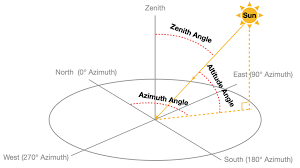


**Solar Zenith Angle**

Uydu tabanlı bir cihazdan Dünya yüzeyindeki belirli bir noktayı gözlemlerken, Güneş Zenit Açısı (SZA) yerel zenit (yani yerdeki noktanın hemen üstünde) ile o noktadan Güneş'e olan görüş hattı arasındaki açıdır. Bu, Güneş gökyüzünde ne kadar yüksekse SZA'nın o kadar düşük olduğu anlamına gelir. Grafikteki diğer açı, yerel zenit ile uyduya giden görüş hattı arasındaki açı, Görüş Zenit Açısı olarak adlandırılır.



**Azimuth**

Azimut, bir azimut dairesi üzerinde kuzeyden saat yönünde derece cinsinden ölçülen yöndür. Bir azimut dairesi 360 dereceden oluşur. Doksan derece doğuya, 180 derece güneye, 270 derece batıya ve 360 derece ve 0 derece kuzeye karşılık gelir.



**Equation_of_time**

Güneş tarafından ölçülen zaman ile bizim saatlerimiz tarafından ölçülen zaman aynı değildir. İkisi arasındaki farka zaman denklemi denir. [Kaynak](https://www.timeanddate.com/astronomy/equation-of-time.html)

----------------------------------------------------------------------------------------------------

**Solar Zenith Angle**

When observing a specific point on the Earth's surface from a satellite-based instrument, the Solar Zenith Angle (SZA) is the angle between the local zenith (i.e. just above the point on the ground) and the line of sight from that point to the Sun. This means that the higher the Sun is in the sky, the lower the SZA. The other angle on the graph, the angle between the local zenith and the line of sight to the satellite, is called the Solar Zenith Angle.

**Azimuth**

Azimuth is the direction measured in degrees clockwise from north on an azimuth circle.An azimuth circle consists of 360 degrees.Ninety degrees corresponds to east, 180 degrees to south, 270 degrees to west and 360 degrees and 0 degrees to north.

**Equation_of_time**

The time measured by the sun is not the same as the time measured by our clocks.The difference between the two is called the equation of time. [Source](https://www.timeanddate.com/astronomy/equation-of-time.html)

In [ ]:
latitude =  48.7764400
longitude = 2.2902600
tz = "Europe/Berlin"
city = "Sceaux"
start = "2006-01-01"
end = "2010-11-27"

solpos, truetracking_position, turbidity = advanced_solar_features(latitude,
                                                                      longitude,
                                                                      tz,
                                                                      city,
                                                                      start,
                                                                      end)


cs = solar_features(latitude,
                      longitude,
                      tz,
                      city,
                      start,
                      end)
cs.tail()

In [ ]:
#To see what the turbidity data set looks like
turbidity.head()

In [ ]:
#To see what the truetracking_position data set looks like
truetracking_position.head()

In [ ]:
#To see what the solpos data set looks like
solpos.head()

## Meteostat

[Kaynak](https://dev.meteostat.net/python/hourly.html#data-structure)

**Dwpt**

Çiğlenme Noktası - Atmosferik nemin bir ölçüsüdür. Doygunluğa ulaşmak için havanın soğutulması gereken sıcaklıktır (hava basıncı ve nem içeriğinin sabit olduğu varsayılır). [Kaynak](https://w1.weather.gov/glossary/index.php?word=dew+point)

**Rhum**

Hava doymuş olsaydı mevcut olacak miktara göre mevcut atmosferik nem miktarının yüzde olarak ifade edilen bir oranıdır. İkinci miktar sıcaklığa bağlı olduğundan, bağıl nem hem nem içeriğinin hem de sıcaklığın bir fonksiyonudur.

**Prpc**

mm cinsinden bir saatlik yağış toplamı

**wdir**

Derece (°) cinsinden ortalama rüzgar yönü

**wspd**

The average wind speed in km/h

**press**

hPa cinsinden deniz seviyesindeki ortalama hava basıncı

--------------------------------------------------------------------------------------------

[Source](https://dev.meteostat.net/python/hourly.html#data-structure)

**Dwpt**

Dew Point - A measure of atmospheric humidity. It is the temperature at which air must be cooled to reach saturation (assuming constant air pressure and moisture content). [Source](https://w1.weather.gov/glossary/index.php?word=dew+point)

**Rhum**

It is a ratio, expressed as a percentage, of the amount of atmospheric moisture present relative to the amount that would be present if the air were saturated. Since the latter quantity depends on temperature, relative humidity is a function of both moisture content and temperature.

**Prpc**

One-hour rainfall total in mm

**wdir**

Average wind direction in degrees (°)

**wspd**

The average wind speed in km/h

**press**

Average air pressure at sea level in hPa

In [ ]:
weather = meteostat_weather_data(latitude,
                                longitude,
                                start,
                                end)
weather.tail()

In [ ]:
#Merge train and test set with cs, solpos, ...
df_train, df_test = merge_dataframes([df_train, df_test])
df_train

## Detecting Outlier Values

Here we will identify outlier values and try to understand when outlier values occur

In [ ]:
#Create population distribution for Global_active_power
dfit = distfit(distr = "popular")
results = dfit.fit_transform(df_train["Global_active_power"])
predict_result = dfit.predict(df_train["Global_active_power"].values, alpha = 0.05, multtest = None)
#Get outlier values
df_outlier = pd.DataFrame(predict_result["df"])
df_outlier.head()

In [ ]:
#df_2006 = df_train[df_train.index.year == 2006]
df_2007 = df_train[df_train.index.year == 2007]
df_2008 = df_train[df_train.index.year == 2008]
#df_2009 = df_train[df_train.index.year == 2009]
#df_2010 = df_train[df_train.index.year == 2010]

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (20, 12))
for i, dataframe in enumerate([df_2007, df_2008]):
    # Make prediction
    dfit.predict(dataframe["Global_active_power"].values, alpha=0.05, multtest=None)
    # Line plot with data points outside the confidence interval.
    dfit.lineplot(dataframe["Global_active_power"], ax = ax[i])


In [ ]:
#Looking into upper outlier values and lower outlier values
df_upper_outlier = df_train.iloc[df_outlier[df_outlier["y_pred"] == "up"].index]
df_lower_outlier = df_train.iloc[df_outlier[df_outlier["y_pred"] == "down"].index]
print("Head of Dataframe for Upper Outliers")
print(df_upper_outlier.head())
print("*"*100)
print("Head of Dataframe for Lower Outliers")
print(df_lower_outlier.head())

In [ ]:
columns_pie = [
    "Month",
    "Day_ofweek",
    "Hour"
]

#Plot pie chart for upper_outlier
plot_pie(df_upper_outlier, columns_pie)

In [ ]:
#Plot pie chart for lower_outlier
plot_pie(df_lower_outlier, columns_pie, title = "Lower")

- Outlier değerlerin yüksekleri incelendiğinde
    - Ay olarak: Ekim Ayından Mart ayına kadar değerler büyük yüzdeyi kapsamıştır. Soğuk hava şartları elektrik tüketimini artırdığını görüyoruz.
    - Haftanın Günü olarak: Cumartesi ve Pazar günleri diğer günlere göre oldukça sık görülmüştür. Hafta sonları insanlar evlerinde olduğundan elektrik tüketiminin arttığını görüyoruz.
    - Saat olarak: 17'den 21'e kadarki saatler diğer saatlere göre oldukça sık görülmüştür. İnsanlar işten gelip evde ayakta kaldığı zamanlara denk gelmektedir.
    
 
- Outlier değerlerin düşükleri incelendiğinde
     - Ay olarak: Mayıs Ayından Eylül ayına kadar değerler büyük yüzdeyi kapsamıştır. Sıcak hava şartlarının elektrik tüketimini azalttığını görüyoruz.
     - Haftanın Günü olarak: Neredeyse hepsi aynı yüzdeyi kapsamıştır.
     - Saat olarak: Gece 1'den Sabah 6'ya kadarki saatler diğer saatlere göre oldukça sık görülmüştür. İnsanların uyuduğu zamana denk gelmektedir.
 
 --------------------------------------------------------------------------------------------
 
- When the high outlier values are examined
    - By month: Values from October to March cover the largest percentage. We see that cold weather conditions increase electricity consumption.
    - As Day of the Week: Saturdays and Sundays are more common than other days. Since people are at home on weekends, we see that electricity consumption increases.
    - Time of day: The hours between 17:00 and 21:00 are more frequent than other hours. It coincides with the times when people come from work and stay at home.
    
 
- When the low outlier values are analyzed
     - By month: Values from May to September cover the largest percentage. We see that warm weather conditions reduce electricity consumption.
     - By Day of the Week: Almost all covered the same percentage.
     - In hours: The hours from 1 am to 6 am were more frequent than other hours. It coincides with the time when people are sleeping.
 

Hatırlarsak 2008 yılının Ağustos ayındaki diğer ayalra göre oldukça düşük çıkmış idi. İstersek bu değerleri trend bozulmasın diye değiştirebiliriz. Ancak değiştirdikten sonra modellerin performasnını düşürdüğünü gördüm ve bu yüzden uygulamadım

----------------------------------------------------------------------------------------------

If we remember, August 2008 was considerably lower than the other months of 2008. If we want, we can change these values so as not to distort the trend. However, after changing it, I found that it decreased the performance of the models and therefore I did not apply it.

In [ ]:
if config.change_2008August_values:
    #Change 2008 august values with mean values grouped by Hour, Day_ofweek and Month
    first_cond = (df_train.index.year == 2008)
    second_cond = (df_train.index.month == 8)
    
    a = df_train.loc[~(first_cond & second_cond)].groupby(["Hour", "Day_ofweek", "Month"]).mean().reset_index(drop = False)
    a = a[a.Month == 8]
    change_cols = [
        "Global_active_power",
        "Global_reactive_power",
        "Voltage",
        "Sub_metering_1",
        "Sub_metering_2",
        "Sub_metering_3"
    ]
    df_train.loc[first_cond & second_cond, change_cols] = pd.merge(df_train.loc[first_cond & second_cond, change_cols + ["Hour", "Day_ofweek"]], a, on = ["Hour", "Day_ofweek"], how = "left", suffixes = ("_old", ""))[change_cols].values

## Feature Engineering

In [ ]:
if config.sum_sub_meterings:
    for dataframe in [df_train, df_test]:
        #Add sum of Sub_metering_1, Sub_metering_2 and Sub_metering_3
        dataframe["Sum_Sub_Meterings"] = dataframe["Sub_metering_1"] + dataframe["Sub_metering_2"] + dataframe["Sub_metering_3"]

    #Drop Sub_metering_1, Sub_metering_2 and Sub_metering_3 from train and test set
    df_train = df_train.drop(["Sub_metering_1", "Sub_metering_2", "Sub_metering_3"], axis = 1)
    df_test = df_test.drop(["Sub_metering_1", "Sub_metering_2", "Sub_metering_3"], axis = 1)

In [ ]:
if config.add_moving_averages:
    def moving_average(dataframe: pd.DataFrame, 
                       windows:list):
        """
            Veri setine istediğimiz sayıda Global_active_power özelliğinin ortalamasını eklemek için oluşturduk.
        """
        for window in windows:
            dataframe[f"Global_active_power_rolling_{window}"] = dataframe["Global_active_power"].shift(1).rolling(window = window, min_periods = 1).mean()
        
        return dataframe
    
    for dataframe in [df_train, df_test]:
        #Add moving averages
        df_train = moving_average(df_train, [24, 48, 72, 96, 120])
        df_test = moving_average(df_test, [24, 48, 72, 96, 120])
        
        df_train = df_train.dropna()  # Because of 1 shift in moving_average fuction, there will be 1 NaN value
        df_test = df_test.dropna()   # Because of 1 shift in moving_average fuction, there will be 1 NaN value

# Dimensionality Reduction

In [ ]:
if config.use_pca:
    exclude_cols = [
                   "Hour",
                   "Day_ofweek",
                   "Day_ofmonth",
                   "Day_ofyear",
                   "Week_ofyear",
                   "Month",
                   "Quarter",
                   "Year",
                   "Global_active_power"
                   ]
    include_cols = [col for col in df_train.columns if not col in exclude_cols]
    #Create PCA Object
    pca = PCA(whiten = True)
    #Fit and Transform cols
    x_PCA =  pca.fit(df_train[include_cols])
    #Create figure for graph
    plt.figure(figsize=(18,6))
    #Plot lineplot for explained_variance_ratio_
    sns.lineplot(np.cumsum(x_PCA.explained_variance_ratio_))
    #Plot horizantal line at 0.99
    plt.axhline(0.99, c="r")
    # Set x-axis tick locations and labels
    plt.xticks(range(0, 22, 1))
    #Set x_label
    plt.xlabel("number of components")
    #Set y_label
    plt.ylabel("cumulative explained variance")
    #Display graph
    plt.show()

Kategorik verileri dışarı çıkardığımızda  yüzde 99'luk bilgi için 3 boyutlu PCA yeterlidir.

--------------------------------------------------------------------------------

When we exclude categorical data, 3D PCA is sufficient for 99 percent information.

In [ ]:
if config.use_pca:

    # Created PCA with 3 Dimensional
    pca = PCA(n_components = 3, whiten = True)

    #Create pca values from train and test set
    train_PCA = pca.fit_transform(df_train[include_cols])
    test_PCA = pca.transform(df_test[include_cols])

    #Remove include cols from train and test set
    df_train = df_train.drop(include_cols, axis = 1)
    df_test = df_test.drop(include_cols, axis = 1)


    #Concat pca values with train and test set
    df_train[["PCA_1", "PCA_2", "PCA_3"]] = train_PCA
    df_test[["PCA_1", "PCA_2", "PCA_3"]] = test_PCA
    df_train.head()

# MODELING

In [ ]:
# Create target feature for predict after 24 hours
df["Target"] = df["Global_active_power"].shift(-24)
df_train["Target"] = df.loc[df.index <= "2010-06-01", "Target"].copy()
df_test["Target"] = df.loc[df.index > "2010-06-01", "Target"].copy()


df_test = df_test.dropna()
df_train.head()

Tahmin etmek istediğimiz "Global_active_power" özelliği log normal dağılımı göstermekte. Tahminin iyileşmesi adına özelliğin logaritmasını aldıktan sonra normal dağılıma çevireceğim. 

-------------------------------------------------------------------------------------------------------------

The “Global_active_power” feature we want to estimate is log normal distribution. To improve the estimation, I will take the logarithm of the feature and convert it to normal distribution. 

In [ ]:
#Log of Global_active_power
df_train["Log_oftarget"] = np.log(df_train["Global_active_power"])
df_test["Log_oftarget"] = np.log(df_test["Global_active_power"])

#Normalization of Global_active_power
standart_scaler = StandardScaler()
df_train["Normalization_oftarget"] = standart_scaler.fit_transform(df_train["Log_oftarget"].values.reshape(-1,1))
df_test["Normalization_oftarget"] = standart_scaler.transform(df_test["Log_oftarget"].values.reshape(-1, 1))

In [ ]:
# Change Week_ofyear data type
df_train["Week_ofyear"] = df_train["Week_ofyear"].astype(int)
df_test["Week_ofyear"] = df_test["Week_ofyear"].astype(int)

In [ ]:
#Create X and y dataset from train and test set
X_train = df_train.drop(["Target","Log_oftarget", "Normalization_oftarget"], axis = 1)
y_train = df_train["Normalization_oftarget"].reset_index(drop = True)

X_test = df_test.drop(["Target", "Log_oftarget", "Normalization_oftarget"], axis = 1)
y_test = df_test["Target"].reset_index(drop = True)

In [ ]:
#Create TimeSeriesSplit
cv = TimeSeriesSplit(n_splits = config.n_splits)

## XGB

In [ ]:
cat_features = [
    "Hour",
    "Day_ofweek",
    "Day_ofmonth",
    "Day_ofyear",
    "Week_ofyear",
    "Month",
    "Quarter",
    "Year"
]
#Change cat features data type to category
X_train[cat_features] = X_train[cat_features].astype("category")
X_test[cat_features] = X_test[cat_features].astype("category")

In [ ]:
params_XGB = {
    "booster": "gbtree",
    #"device": "gpu", #if you want to use gpu
    "max_depth": 2,
    "lambda": 1, #L2 regularization
    "tree_method": "hist", #Faster histogram optimized approximate greedy algorithm.
    "grow_policy": "depthwise", #Controls a way new nodes are added to the tree.
    "enable_categorical": True,
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    #"n_estimators" : 200,
    "learning_rate": 0.01,
    "early_stopping_rounds" : 500
    
}
predicters = {
    "XGBRegressor" : xgb.XGBRegressor(**params_XGB)
}

In [ ]:
def create_model(
                X: pd.DataFrame,
                y: pd.Series,
                X_test: pd.DataFrame,
                y_test : pd.Series,
                cv: TimeSeriesSplit,
                predicters: dict,
                
):
    mean_squared_error_scores = list()
    models = list()
    test_preds = list()
    for name, model in predicters.items():
        print(f"Evaluating {name}...")
        fold_test_mse_scores = list()
        elapsed_time = 0
        for idx, (train_idx, val_idx) in enumerate(cv.split(X=X, y = y)):
            start_time = time.time()
            
            print(f"train_idx: {train_idx}")
            print(f"val_idx: {val_idx}")

            X_train = X.iloc[train_idx].copy()
            y_train = y.iloc[train_idx].copy()
            X_val = X.iloc[val_idx].copy()
            y_val = y.iloc[val_idx].copy()
            

            model.fit(X_train,
                        y_train,
                        eval_set=[(X_train, y_train),(X_val, y_val)],

                        verbose=250)
        
        
            test_pred = model.predict(X_test)
            test_pred = np.exp(standart_scaler.inverse_transform(test_pred.reshape(-1,1)))
            test_preds.append(test_pred)
            
            fold_test_mse_score = mean_squared_error(y_true = y_test, y_pred = test_pred )
            print(f"\n{name} Model Fold {idx + 1} Mean Squred Error for Test Set:{fold_test_mse_score}")


            fold_test_mse_scores.append(fold_test_mse_score)

            #model_file_path = f"{name}_fold_{idx + 1}.pkl"
            #joblib.dump(model, os.path.join(config.model_path, model_file_path))
            models.append(model)

            end_time = time.time()
            elapsed = end_time - start_time
            print(f"Time to {name} Model for Fold {idx + 1}: {elapsed}")
            print("*"*120)

            elapsed_time += elapsed

        print(f"{name} model run time is : {elapsed_time} seconds")
        print(f"{name} model has a mean of Mean Squared Error Score for Test Set: {np.mean(fold_test_mse_scores)}")
        print("*"*120)

        mean_squared_error_scores.append(fold_test_mse_scores)

    return fold_test_mse_scores, models, test_preds

In [ ]:
fold_test_mse_scores_xgb, models_xgb, test_preds_xgb = create_model(X_train,
                                                                        y_train,
                                                                        X_test,
                                                                        y_test,
                                                                        cv = cv,
                                                                        predicters = predicters)

In [ ]:
#Create figure and axes for grap
fig, ax = plt.subplots(nrows = 1, ncols = config.n_splits, figsize = (25, 6))
for i, model in enumerate(models_xgb):
    #Get evaluation results
    result = model.evals_result()
    #Create figure for graph
    plt.figure(figsize = (10, 6))
    #Plot lineplot for train and validation set
    sns.lineplot(result["validation_0"]["rmse"], label = "Train", ax=ax[i])
    sns.lineplot(result["validation_1"]["rmse"], label = "Validation", ax = ax[i])
    
    #Set title for graph
    ax[i].set_title(f"RMSE Loss for Fold {i + 1} ", 
              fontsize = 15, 
              fontweight = 15)
    #Set x_axis and y_axis label
    ax[i].set_ylabel("RMSE")
    ax[i].set_xlabel("Epochs")

#Display graph
plt.show()

## MLP

In [ ]:
#Create one hot encoder
encoder = OneHotEncoder(sparse_output = False)

#One hot encoder to train set
results_train = encoder.fit_transform(X_train[cat_features])
X_train = pd.concat([X_train, pd.DataFrame(results_train, index = df_train.index)], axis = 1)
X_train = X_train.drop(cat_features, axis = 1)

#One hot encoder the test set
results_test = encoder.transform(X_test[cat_features])
X_test = pd.concat([X_test, pd.DataFrame(results_test, index = df_test.index)], axis = 1)
X_test = X_test.drop(cat_features, axis = 1)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
#regularizers
from tensorflow.keras.layers import Dropout # one of the best regularizers
from tensorflow.keras.regularizers import l1,l2,l1_l2

#optimizers
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop
#metrics
from tensorflow.keras.metrics import MeanSquaredError

In [ ]:
model = Sequential()
#Add input layer
model.add(Flatten(input_shape = (X_train.shape[1],)))
#Add first hidden layer
model.add(Dense(16, activation = "leaky_relu", kernel_initializer='he_normal', kernel_regularizer = l2(0.02))) #kernel_regularizer = l2(0.01)
#Add second hidden layer
model.add(Dense(4, activation = "leaky_relu", kernel_regularizer = l2(0.01))) #kernel_regularizer = l2(0.01)
#Add third hidden layer
#model.add(Dense(8, activation = "leaky_relu"))
#Add output layer
model.add(Dense(1, activation = "linear"))

#Create early stopping conditions for MLP model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 20, restore_best_weights=True, min_delta = 0.005, start_from_epoch = 50)

model.summary()

In [ ]:
def create_FCL_model(
                X:pd.DataFrame,
                y: pd.Series,
                X_test: pd.DataFrame,
                y_test: pd.Series,
                cv:TimeSeriesSplit,
                model: tf.keras.models,
                early_stopping: tf.keras.callbacks.EarlyStopping
):
    
    #mean_squared_error_scores = list()
    models = list()
    test_preds = list()
    fold_test_mse_scores = list()
    elapsed_time = 0
    histories = list()
    
    for idx, (train_idx, val_idx) in enumerate(cv.split(X = X, y = y)):
        start_time = time.time()
        
        X_train = np.array(X.iloc[train_idx].values.copy())
        y_train = np.array(y.iloc[train_idx].values.copy())
        
        X_val = np.array(X.iloc[val_idx].values.copy())
        y_val = np.array(y.iloc[val_idx].values.copy())
        
       
        model.compile(
            optimizer = RMSprop(learning_rate = 0.0001),
            loss = "mse",
            metrics = [MeanSquaredError]
            
        )
        
        history = model.fit(X_train, 
                            y_train, 
                            epochs = 1000, 
                            batch_size = 32, 
                            validation_data = (X_val, y_val), 
                            callbacks = [early_stopping], 
                            verbose = 2
                           )
        
        #Add history to list
        histories.append(history)
        
        test_pred = model.predict(X_test)
        test_pred = np.exp(standart_scaler.inverse_transform(test_pred))
        test_preds.append(test_pred)
        

        fold_test_mse_score = mean_squared_error(y_true = y_test, y_pred = test_pred)
        print(f"\nFully Connected Layer Model Fold {idx + 1} Mean Squred Error for Test Set:{fold_test_mse_score}")
        
        fold_test_mse_scores.append(fold_test_mse_score)

        #model_file_path = f"{name}_fold_{idx + 1}.pkl"
        #joblib.dump(model, os.path.join(config.model_path, model_file_path))
        models.append(model)

        end_time = time.time()
        elapsed = end_time - start_time
        print(f"Time to Fully Connected Layer Model for Fold {idx + 1}: {elapsed}")
        print("*"*120)

        elapsed_time += elapsed
        
    print(f"Fully Connected Layer model run time is : {elapsed_time} seconds")
    print(f"Fully Connected Layer model has a mean of Mean Squared Error Score for Test Set: {np.mean(fold_test_mse_scores)}")
    print("*"*120)

    #mean_squared_error_scores.append(fold_test_mse_scores)

    return fold_test_mse_scores, models, histories, test_preds


In [ ]:
fold_test_mse_scores_fcl, models_fcl, histories_fcl, test_preds_fcl = create_FCL_model(X_train,
                                                                        y_train,
                                                                        X_test,
                                                                        y_test,
                                                                        cv = cv,
                                                                        model = model,
                                                                        early_stopping = early_stopping
                                                                    )

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = config.n_splits, figsize = (25, 6))
for i, history in enumerate(histories_fcl):
    #Lineplot for train and validation loss
    sns.lineplot(history.history["loss"], label = "Train", color = "blue", ax = ax[i])
    sns.lineplot(history.history["val_loss"], label = "Validation", color = "orange", ax = ax[i])
    
    #Set title for graph
    ax[i].set_title(f"MSE Loss for Fold {i + 1} ", 
              fontsize = 15, 
              fontweight = 15)
    #Set x_axis and y_axis label
    ax[i].set_ylabel("MSE")
    ax[i].set_xlabel("Epochs")

#Display graph
plt.show()

## LSTM

Son 24 saatin verilerini kullanarak 24 saat sonrasının verilerini tahmin etmeye çalışacağız.

In [ ]:
from tensorflow.keras.layers import LSTM

In [ ]:
def create_dataset_LSTM(dataframe:pd.DataFrame,
                       first_target: str = "Normalization_oftarget",
                       second_target: str = "Normalization_oftarget"):
    
    X = []
    y = []
    
    for i in range(24, dataframe.shape[0]-24):
        X.append(dataframe.iloc[i-24:i+1][first_target]) # Get last 24 hours values
        y.append(dataframe.iloc[i+24][second_target])     #To predict after 24 hours
    
    #Convert to X_train and y_train to numpy arrays
    X, y = np.array(X), np.array(y)

    #Reshape the data
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))
    
    return X, y

In [ ]:
X_train, y_train =  create_dataset_LSTM(df_train)
X_test, y_test = create_dataset_LSTM(df_test, second_target = "Target")

In [ ]:
#Build the LSTM Model
model = Sequential()
#Add LSTM layer
model.add(LSTM(16, return_sequences = True, input_shape = (X_train.shape[1], 1)))
#Add LSTM Layer
model.add(LSTM(8, return_sequences = False))
#Add Hidden Layer
model.add(Dense(8, activation = "leaky_relu", kernel_regularizer = l2(0.01)))
#Add output layer
model.add(Dense(1, activation = "linear"))

In [ ]:
def create_LSTM_model(
                X:pd.DataFrame,
                y: pd.Series,
                X_test: pd.DataFrame,
                y_test: pd.Series,
                cv:TimeSeriesSplit,
                model: tf.keras.models,
                early_stopping: tf.keras.callbacks.EarlyStopping


):
    models = list()
    test_preds = list()
    fold_test_mse_scores = list()
    elapsed_time = 0
    histories = list()
    for idx, (train_idx, val_idx) in enumerate(cv.split(X=X, y = y)):
        start_time = time.time()

        print(f"train_idx: {train_idx}")
        print(f"val_idx: {val_idx}")

        X_train = X[train_idx].copy()
        y_train = y[train_idx].copy()
        X_val = X[val_idx].copy()
        y_val = y[val_idx].copy()


        model.compile(
            optimizer = Adam(learning_rate = 0.0001),
            loss = "mse",
            metrics = [MeanSquaredError]
            
        )
        
        history = model.fit(X_train, 
                            y_train, 
                            epochs = 200, 
                            batch_size = 32, 
                            validation_data = (X_val, y_val), 
                            callbacks = [early_stopping], 
                            verbose = 2
                           )
        
        #Add history to list
        histories.append(history)
        
        test_pred = model.predict(X_test)
        test_pred = np.exp(standart_scaler.inverse_transform(test_pred))
        test_preds.append(test_pred)
        

        fold_test_mse_score = mean_squared_error(y_true = y_test, y_pred = test_pred)
        print(f"\nLSTM Model Fold {idx + 1} Mean Squred Error for Test Set:{fold_test_mse_score}")
        
        fold_test_mse_scores.append(fold_test_mse_score)

        #model_file_path = f"{name}_fold_{idx + 1}.pkl"
        #joblib.dump(model, os.path.join(config.model_path, model_file_path))
        models.append(model)

        end_time = time.time()
        elapsed = end_time - start_time
        print(f"Time to LSTM Model for Fold {idx + 1}: {elapsed}")
        print("*"*120)

        elapsed_time += elapsed
        
    print(f"LSTM model run time is : {elapsed_time} seconds")
    print(f"LSTM model has a mean of Mean Squared Error Score for Test Set: {np.mean(fold_test_mse_scores)}")
    print("*"*120)

    return fold_test_mse_scores, models, histories, test_preds


In [ ]:
fold_test_mse_scores_lstm, models_lstm, histories_lstm, test_preds_lstm = create_LSTM_model(X_train,
                                                                                            y_train,
                                                                                            X_test,
                                                                                            y_test,
                                                                                            cv = cv,
                                                                                            model = model,
                                                                                            early_stopping = early_stopping
                                                                                            )

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = config.n_splits, figsize = (25, 6))
for i, history in enumerate(histories_lstm):
    #Lineplot for train and validation loss
    sns.lineplot(history.history["loss"], label = "Train", color = "blue", ax = ax[i])
    sns.lineplot(history.history["val_loss"], label = "Validation", color = "orange", ax = ax[i])
    
    #Set title for graph
    ax[i].set_title(f"MSE Loss for Fold {i + 1} ", 
              fontsize = 15, 
              fontweight = 15)
    #Set x_axis and y_axis label
    ax[i].set_ylabel("MSE")
    ax[i].set_xlabel("Epochs")

#Display graph
plt.show()

## Compared Models

In [ ]:
fig, ax = plt.subplots(nrows = config.n_splits, ncols = 1, figsize = (20, 5*config.n_splits))

for i in range(config.n_splits):
    sns.lineplot(y_test, label = "True", color = "blue", ax = ax[i])
    sns.lineplot(np.array(test_preds_lstm[i]).reshape(-1), label = "Pred LSTM", color = "orange", linestyle = "--", linewidth = 2, ax = ax[i])
    sns.lineplot(np.array(test_preds_fcl[i]).reshape(-1), label = "Pred Fully Connected Layer", color = "green", linestyle = "dotted", ax = ax[i])
    sns.lineplot(np.array(test_preds_xgb[i]).reshape(-1), label = "Pred Xgboost", color = "red", linestyle = "dashdot", ax = ax[i])
    ax[i].set_title(f"Fold {i+1} Preds vs True Values", weight = "bold", fontsize = 10)
    ax[i].legend()

plt.show()
    

In [ ]:
# Create dataframe to compared MSE Results
list_offold = [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5]
list_of_models = ["XGB", "XGB", "XGB", "XGB", "XGB", 
                  "Fully Connected Layer", "Fully Connected Layer", "Fully Connected Layer", "Fully Connected Layer", "Fully Connected Layer",
                 "LSTM", "LSTM", "LSTM", "LSTM", "LSTM"]
list_of_mse_metrics = fold_test_mse_scores_xgb + fold_test_mse_scores_fcl + fold_test_mse_scores_lstm

a = pd.DataFrame(
    {
        "Fold": list_offold,
        "Model Name": list_of_models,
        "MSE": list_of_mse_metrics
        
        
    }
)

#Create barplot to compare MSE Results of Models
plt.figure(figsize = (15, 6))
sns.barplot(a, x = "Fold", y = "MSE", hue = "Model Name")
plt.title("Comparison of MSE Scores of Models for Test Set")
#plt.legend()
plt.show()